In [1]:
from analysis.musical import consonance_ordered_notes, consonance_probabilities

root_note = "C4"
consonance_ordered_notes(root_note)


['C5', 'G4', 'F4', 'E4', 'A4', 'G#4', 'D#4', 'F#4', 'A#4', 'D4', 'B4', 'C#4']

In [2]:
# scores = consonance_scores(min_value=0.01, max_value=0.99, dont_adjust=True)
scores = consonance_probabilities()
scores

[0.14666666666666667,
 0.13333333333333333,
 0.12,
 0.10666666666666667,
 0.10666666666666667,
 0.09333333333333334,
 0.08,
 0.06666666666666667,
 0.05333333333333334,
 0.05333333333333334,
 0.02666666666666667,
 0.013333333333333334]

In [3]:
root_note = "C4"

In [14]:

from analysis.musical import consonance_scores
from analysis.spike_tensor import generate_expectation, generate_snapshot, generate_spike_tensor
import matplotlib.pyplot as plt
from cache import get_spikes

def plot_snapshot(note):
    print(consonance_ordered_notes(note))
    scores = consonance_scores()
    spike_tensors = [generate_spike_tensor(get_spikes(note), tau=0.00001) for note in consonance_ordered_notes(note)]
    expectation = generate_expectation(spike_tensors, scores)
    spikes = get_spikes(root_note)
    tensor = generate_spike_tensor(spikes)
    snapshot = generate_snapshot(tensor, expectation, snap_size=11)
    print(snapshot)
    plt.plot(snapshot)
    plt.show()

In [5]:
# import matplotlib.pyplot as plt
# import numpy as np

# for tensor in spike_tensors:
#     tension = - np.sum(tensor * expectation)
# tension = [-np.sum(tensor * expectation) for tensor in spike_tensors]

# plt.plot(tension)

[-0.00029342796967035196, -0.00025773705761521286, -0.00021903642773208397, -0.0003102034333001489, -0.00027893450591275466, -0.0002684320454776645, -0.000247954934277014, -0.000240348677494561, -0.00027118370898830696, -0.0002853450151321924, -0.00021466212937086348]


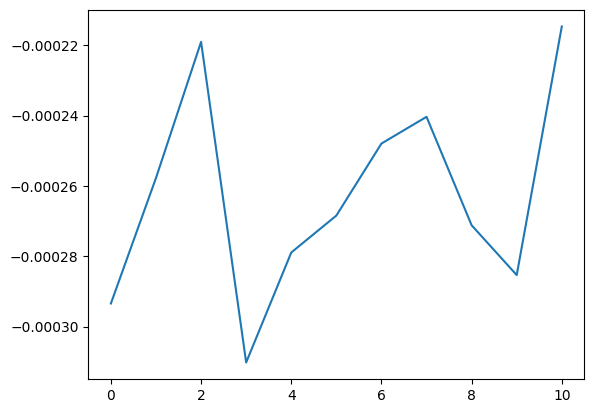

In [6]:
from analysis.musical import consonance_scores

plot_snapshot(consonance_scores())

[-0.0002799989201738555, -0.0002658233656032178, -0.00029820958653424307, -0.0002178329255553264, -0.0002937541503117512, -0.00026662608391296876, -0.00026937290037437747, -0.00026207569118217797, -0.0002188396855408534, -0.00027255558110088676, -0.0002976372327320336]


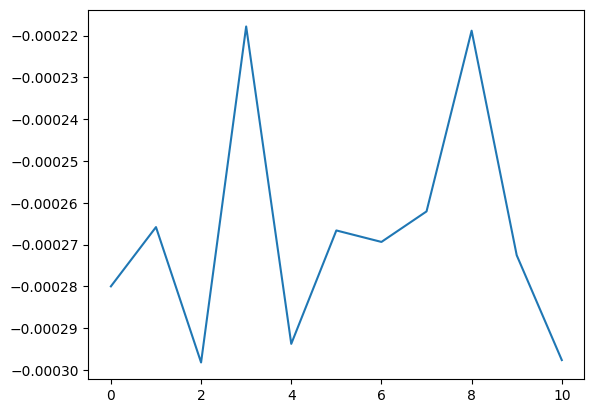

In [10]:
root_note = "D4"
plot_snapshot(consonance_scores())

[-0.0002203769433477511, -0.00025777565432870154, -0.0002484544744249826, -0.0002450751633397705, -0.00025969150762564133, -0.0001968902228772369, -0.00023229030621822644, -0.00030103444006438965, -0.00030750894318035615, -0.00026260705522738835, -0.0002934691152408914]


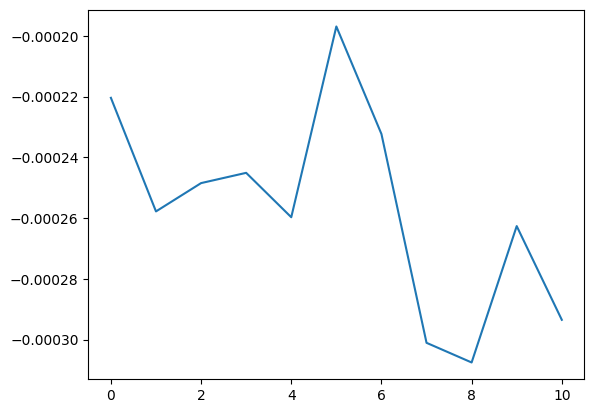

In [11]:
root_note = "E4"
plot_snapshot(consonance_scores())

[-0.00027088476001483957, -0.00026372915596876414, -0.00031246828795782717, -0.00026144251101025556, -0.00023000789226719493, -0.00021785750480042494, -0.00025177758254680275, -0.0001969274611016481, -0.00024018636579320904, -0.00019338766541407432, -0.00026825351868792647]


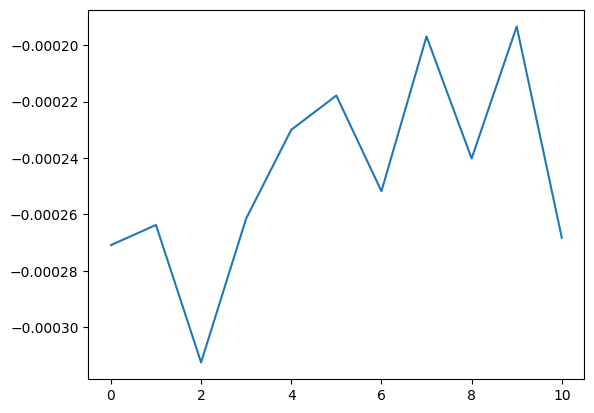

In [12]:
root_note = "F4"
plot_snapshot(consonance_scores())

['G5', 'D5', 'C5', 'B4', 'E5', 'D#5', 'A#4', 'C#5', 'F5', 'A4', 'F#5', 'G#4']
[-0.00026706921383844005, -0.00027797647360882613, -0.00023336791500195135, -0.00017554701073415265, -0.0002455280289768581, -0.00025934047127028944, -0.0002378056515118084, -0.0002461050636488088, -0.00023036001323514346, -0.00026343047827041523, -0.00019979482849689532]


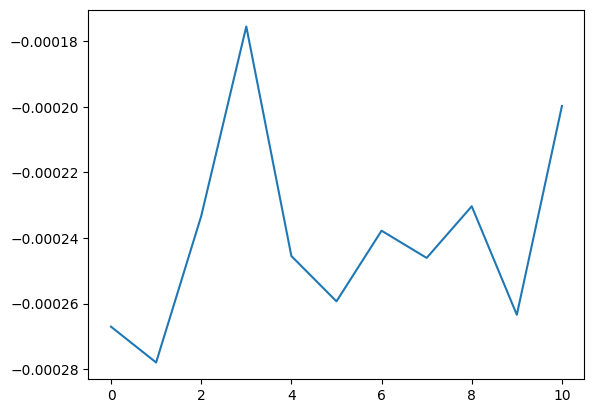

In [15]:
plot_snapshot("G4")

[-0.96, 0.09, -0.58, -0.91, -0.57, 0.96, 0.96, -0.49, 0.99, -0.32, -0.91, -0.77]
[-0.0012084887465904383, -0.0012493930257818744, -0.0012026720356246607, -0.0011708691224478597, -0.0012337923129977205, -0.0012289490779001302, -0.001199650564967675, -0.0012857514541000595, -0.0012233665743408063, -0.0013047071766044104, -0.0012421695025531783]


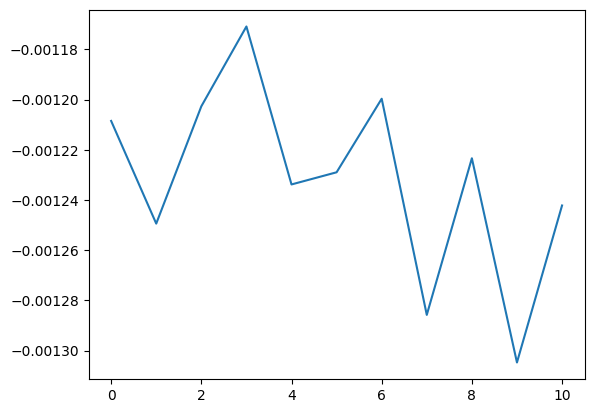

In [8]:
# RANDOM 0 -> 1

import random
import numpy as np
random_numbers = np.random.rand(12)

random_numbers = [-numb if random.random() <= 0.5 else numb for numb in random_numbers]
print([round(numb, 2) for numb in random_numbers])
plot_snapshot(random_numbers)
